$- (grad (q(u) grad(u))=f$

In [1]:
#u=u_D
#taking q(u)=1+u^2

In [2]:
from __future__ import print_function

In [3]:
#Feniccs also have sym function so importing it before importing sympy to avoid name-clash
from fenics import *

def q(u):
    return 1+u

## Import sympy for calculation of 'f'

In [4]:
import sympy as sym

x,y=sym.symbols('x[0],x[1]')
# manufactured solution
u=1+x*x+2*y
#calculating f
f=- sym.diff(q(u)*sym.diff(u,x),x)-sym.diff(q(u)*sym.diff(u,y),y)
f=sym.simplify(f)
f

-6*x[0]**2 - 4*x[1] - 8


## Turn the expression for u and f into C or C++ syntax for fenics implementation

In [5]:
u_code = sym.printing.ccode(u)
f_code = sym.printing.ccode(f)
print('u =', u_code)
print('f =', f_code)

u = pow(x[0], 2) + 2*x[1] + 1
f = -6*pow(x[0], 2) - 4*x[1] - 8


## Define the mesh

In [6]:
mesh=UnitSquareMesh(8,8)
V=FunctionSpace(mesh,'P',1)


## Define the boundary conditions

In [7]:
u_D=Expression(u_code,degree=2)
def boundary(x,on_boundary):
    return on_boundary
bc = DirichletBC(V, u_D, boundary)

## Define the variational problem

In [8]:
# u must be defined as function intead of trial function for non-linear problems
u=Function(V)
v=TestFunction(V)
f=Expression(f_code,degree=2)
F=q(u)*dot(grad(u),grad(v))*dx-f*v*dx


## Computing the solution

In [12]:
#The solve function takes the nonlinear equations, derives symbolically the
#Jacobian matrix, and runs a Newton method to compute the solution
solve(F==0,u,bc)
u

Coefficient(FunctionSpace(Mesh(VectorElement(FiniteElement('Lagrange', triangle, 1), dim=2), 0), FiniteElement('Lagrange', triangle, 1)), 7)

f_7


/usr/lib/petsc/lib/python3/dist-packages/dolfin/common/plotting.py:152: UserWarning: The following kwargs were not used by contour: 'interactive'
  return ax.tricontourf(mesh2triang(mesh), C, levels, **kwargs)


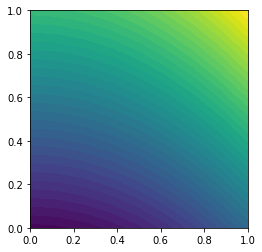

In [15]:
print(u)
plot(u,interactive=True)

In [11]:
u_e = interpolate(u_D, V)
import numpy as np
error_max = np.abs(u_e.vector().get_local() - u.vector().get_local()).max()
print('error_max = ', error_max)

error_max =  8.881784197001252e-15
